In [1]:
from data import Dataset
from sc_ged import SC_GED
from utils import modularity

import matplotlib.pyplot as plt

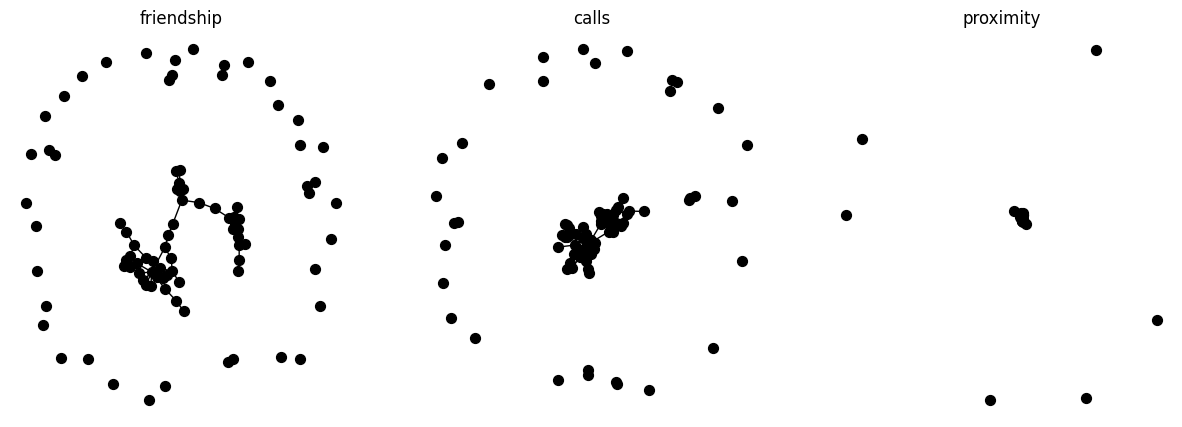

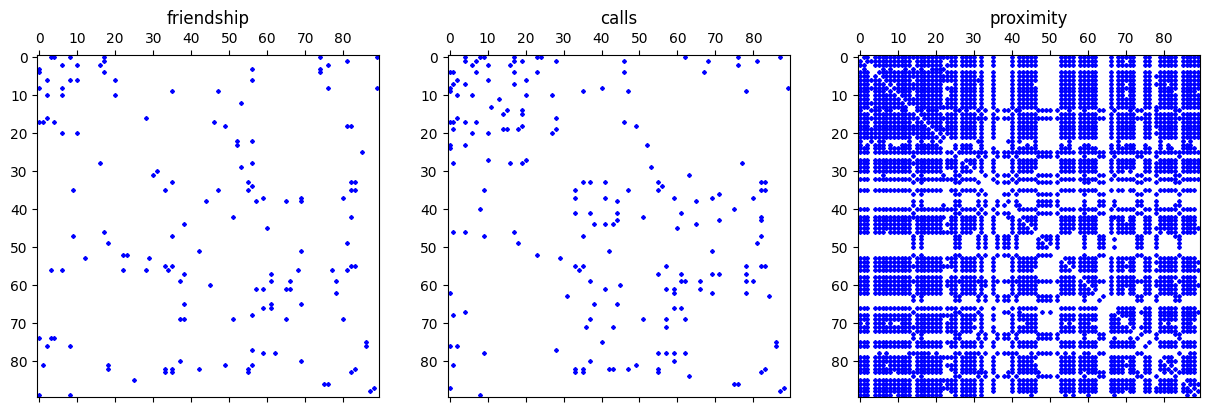

In [2]:
dataset = Dataset("MIT")
dataset.display()

In [21]:
model = SC_GED(dataset.MLG, k=9, most_informative=0, alpha=0.5, beta=10)
model.fit(n_iter=2000)

clustering, accuracy = model.evaluate(dataset.labels, verbose=True)

Joint Eigen Decomposition:   0%|          | 0/2000 [00:00<?, ?it/s]

Joint Eigen Decomposition: 100%|██████████| 2000/2000 [03:20<00:00,  9.98it/s]


norm of P: 21.519439697265625
norm of Q: 20.709814071655273
norm of P @ Q - I: 39.55905532836914
Best accuracy: 0.36666666666666664


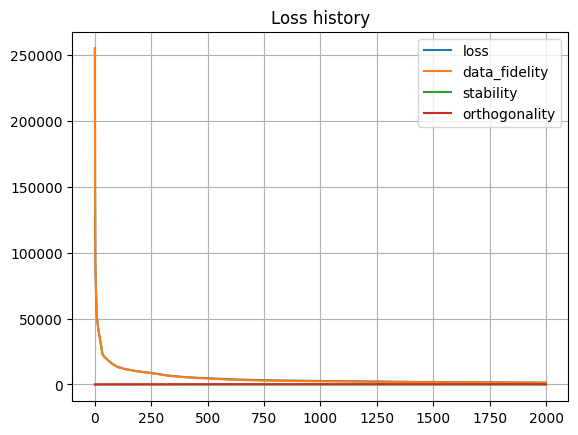

In [22]:
model.plot_loss()

In [23]:
for layer, G in zip(dataset.layer_labels, dataset.MLG):
    m = modularity(G, clustering)
    print(f"Modularity of layer based on clustering {layer}: {m:.4f}")

Modularity of layer based on clustering friendship: 0.1306
Modularity of layer based on clustering calls: 0.0284
Modularity of layer based on clustering proximity: 0.0323


In [10]:
accuracy = []
betas = [1, 5, 10, 15, 30, 50, 100, 200, 500, 1000]
for beta in betas:
    print(f"Beta = {beta}")
    model = SC_GED(dataset.MLG, k=9, most_informative=0, alpha=0.5, beta=beta)
    model.fit(n_iter=200)
    clustering, accuracy_value = model.evaluate(dataset.labels)
    accuracy.append(accuracy_value)

Beta = 1


Joint Eigen Decomposition:   1%|          | 2/200 [00:00<00:12, 15.93it/s]

Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 12.96it/s]


Beta = 5


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.13it/s]


Beta = 10


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:16<00:00, 12.32it/s]


Beta = 15


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:14<00:00, 13.55it/s]


Beta = 30


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:16<00:00, 12.39it/s]


Beta = 50


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:17<00:00, 11.75it/s]


Beta = 100


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:14<00:00, 14.18it/s]


Beta = 200


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:14<00:00, 14.17it/s]


Beta = 500


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:16<00:00, 12.07it/s]


Beta = 1000


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:14<00:00, 13.73it/s]


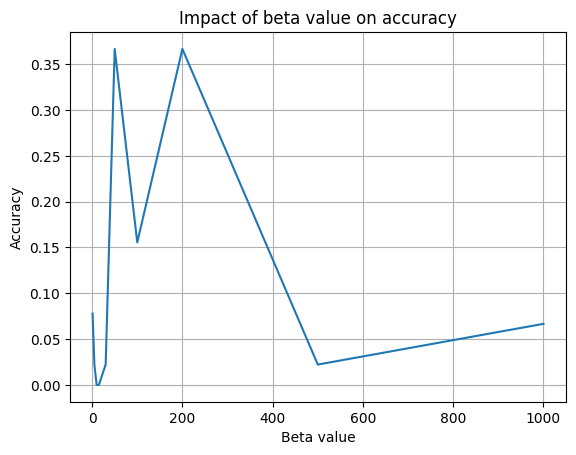

In [11]:
plt.plot(betas, accuracy)
plt.xlabel("Beta value")
plt.ylabel("Accuracy")
plt.title("Impact of beta value on accuracy")
plt.grid()
plt.show()

In [13]:
accuracy = []
alphas = [0, 0.1, 0.5, 1, 3, 5, 7, 10]
for alpha in alphas:
    print(f"Alpha = {alpha}")
    model = SC_GED(dataset.MLG, k=7, most_informative=0, alpha=alpha, beta=200)
    model.fit(n_iter=200)
    clustering, accuracy_value = model.evaluate(dataset.labels)
    accuracy.append(accuracy_value)

Alpha = 0


Joint Eigen Decomposition:   2%|▏         | 4/200 [00:00<00:05, 33.02it/s]

Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.31it/s]


Alpha = 0.1


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.08it/s]


Alpha = 0.5


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.16it/s]


Alpha = 1


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:13<00:00, 14.56it/s]


Alpha = 3


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:17<00:00, 11.26it/s]


Alpha = 5


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:18<00:00, 10.85it/s]


Alpha = 7


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:16<00:00, 11.98it/s]


Alpha = 10


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:20<00:00,  9.88it/s]


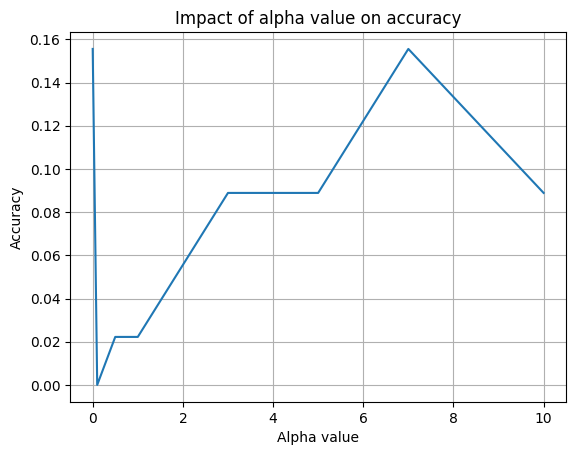

In [14]:
plt.plot(alphas, accuracy)
plt.xlabel("Alpha value")
plt.ylabel("Accuracy")
plt.title("Impact of alpha value on accuracy")
plt.grid()
plt.show()

In [51]:
# grid search for alpha and beta values and plot the accuracy in 3D plot
accuracy = []
alphas = [0, 0.1, 1]
betas = [1, 10, 100, 500, 1000]
for alpha in alphas:
    for beta in betas:
        model = SC_GED(dataset.MLG, k=7, most_informative=0, alpha=alpha, beta=beta)
        model.fit(n_iter=100)
        clustering, accuracy_value = model.evaluate(dataset.labels)
        accuracy.append(accuracy_value)


Joint Eigen Decomposition:   0%|          | 0/100 [00:00<?, ?it/s]

Joint Eigen Decomposition: 100%|██████████| 100/100 [00:07<00:00, 14.09it/s]


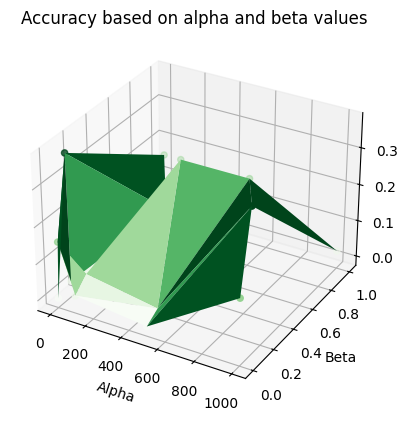

In [62]:
# plot the accuracy in 3D plot
from mpl_toolkits import mplot3d
import numpy as np

mesh_x, mesh_y = np.meshgrid(alphas, betas)


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(mesh_y, mesh_x, accuracy, c=accuracy, cmap="Greens")
ax.plot_trisurf(mesh_y.flatten(), mesh_x.flatten(), accuracy, cmap="Greens")
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta")
ax.set_title("Accuracy based on alpha and beta values")
plt.show()

Results:
* requires manually choosing beta and alpha for each specific case which is not always ideal when we don't have the real labels: very sensitive to alpha and beta values
* Requires a lot of comupations to find the eigenvalues of all layers and eigenvectors of the most informative layer: not suited for high dimentional datasets
* Modularity is high for coauthor layer as we put it as the most informative but also because members of the same group would more likely co-author together. Then there's the lunch and leisure which makes sense because if you work together you will more likely have outside activities together or eat together at lunch. The work was expected to be higher but maybe lunch groups can include different people from the group but not necessarily directly work together during working hours. Finally, the facebook has the lowest modularity as people from different working groups can be friends on social media with anyone from work. 
* A low alpha has no impact in this case on the stability of of P and Q. Maybe it's already inforced implicitly in the data fidelity term. Higher alpha values degrade the results.  

Ideas to implement:
* See how the data_fidelity, sparsity, orthogonality terms evolve over iterations (Normalize maybe and see the difference in scale to find the best beta and alpha)

* Evaluate the impact of different alpha and beta values to conclude the sensitivity of the model to hyperparams

* Implement more evaluation metrics like the ones in the paper

* Test this on a big graph dataset to conclude that it's not suitable for big datasets

* Show how the first eigen vectors can be mapped to 1D dimension 

* Maybe find more datasets with labels this time

